# Szymon Trochimiak, Filip Kucia

# Girvan-newman algorithm implementation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
import csv
import time

class CommunityDetection:
    def __init__(self, graph=None):
        self.graph = graph

    def load_graph_from_csv(self, filename):
        with open(filename, "r") as f:
            reader = csv.reader(f)
            data = list(reader)

        # Check if matrix is symmetric
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                if data[i][j] != data[j][i]:
                    raise ValueError("Matrix is not symmetric.")

        # Create graph
        n = len(data)
        G = nx.Graph()

        for i in range(n):
            for j in range(i + 1, n):
                if data[i][j] == "1":
                    G.add_edge(i, j)

        self.graph = G
        return G

    def girvan_newman(self, num_communities):
        if self.graph is None:
            raise ValueError("Graph not loaded.")

        G1 = self.graph.copy()

        def most_valuable_edge(G0):
            if len(G0) == 1:
                return list(G0.edges())[0]
            edge_betweenness = nx.edge_betweenness_centrality(G0)
            sorted_edge_betweenness = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
            return sorted_edge_betweenness[0][0]

        communities = list(nx.connected_components(G1))
        while (num_communities is None and len(communities) == 1) or (num_communities is not None and len(communities) < num_communities):
            edge_to_remove = most_valuable_edge(G1)
            G1.remove_edge(*edge_to_remove)
            communities = list(nx.connected_components(G1))

        return communities

    def create_csv(self, communities, output_file):
        with open(f'{output_file}', 'w', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(['Node', 'Cluster'])

            nodes = sorted([(node, i + 1) for i, community_set in enumerate(communities) for node in community_set], key=lambda x: x[0])

            for node, cluster in nodes:
                csv_writer.writerow([node, cluster])

    def draw_communities(self, detected_communities):
        if self.graph is None:
            raise ValueError("Graph not loaded.")
        
        num_communities = len(detected_communities)
        colors = plt.cm.tab10(np.linspace(0, 1, num_communities))
        pos = nx.spring_layout(self.graph)

        plt.figure(figsize=(15, 10))

        node_labels = {node: str(node) for node in self.graph.nodes()}
        nx.draw_networkx_labels(self.graph, pos, labels=node_labels, font_size=10)

        for i, community_set in enumerate(detected_communities):
            nx.draw_networkx_nodes(self.graph, pos, nodelist=list(community_set), node_color=[colors[i]] * len(community_set), label=f"Community {i + 1}")

        nx.draw_networkx_edges(self.graph, pos)
        plt.legend()
        plt.show()


    def get_node_colors(self, detected_communities):
        if self.graph is None:
            raise ValueError("Graph not loaded.")

        num_communities = len(detected_communities)
        community_colors = plt.cm.tab10(np.linspace(0, 1, num_communities))
        node_community_mapping = {}
        for i, community_set in enumerate(detected_communities):
            for node in community_set:
                node_community_mapping[node] = i
        node_colors = [community_colors[node_community_mapping[node]] for node in self.graph.nodes()]
        return node_colors


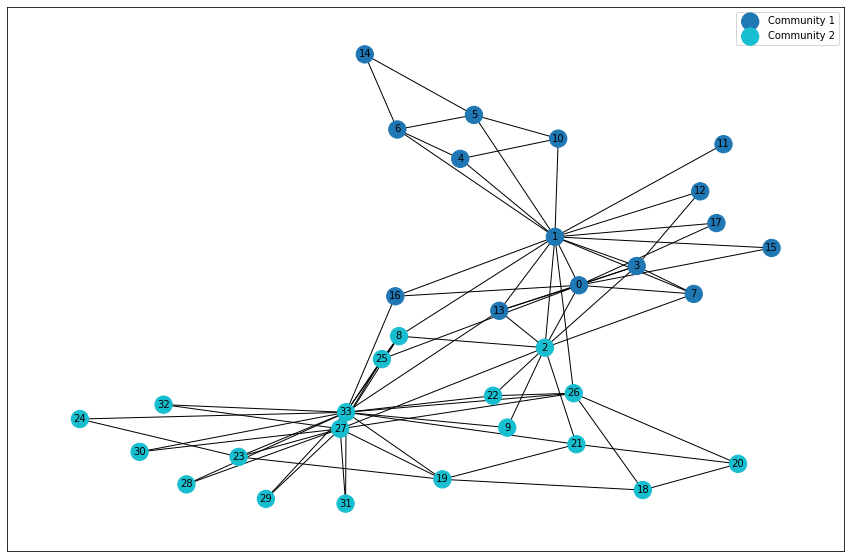

Execution Time: 0.04092741012573242 seconds


In [ ]:
detector = CommunityDetection()
G1 = detector.load_graph_from_csv("data/D1-K=2.csv")
start_time = time.time()
detected_communities = detector.girvan_newman(2)
end_time = time.time()
detector.draw_communities(detected_communities)
detector.create_csv(detected_communities, "results/D1-K=2.csv")
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

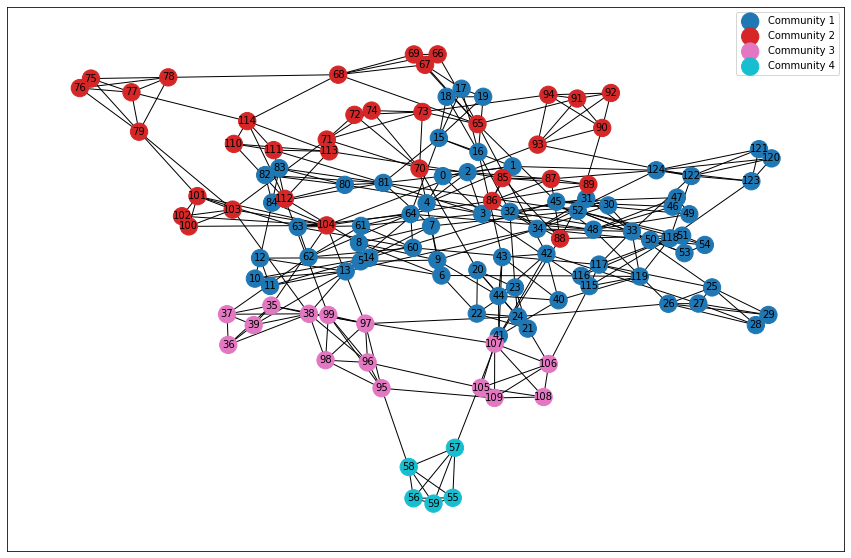

Execution Time: 1.3549823760986328 seconds


In [64]:
import os
file_name = "D1-UNC.csv"
input_file = os.path.join("data", file_name)
output_file = os.path.join("results", file_name)

detector = CommunityDetection()
G1 = detector.load_graph_from_csv(input_file)
start_time = time.time()
detected_communities = detector.girvan_newman(4)
end_time = time.time()
detector.draw_communities(detected_communities)
detector.create_csv(detected_communities, output_file)
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

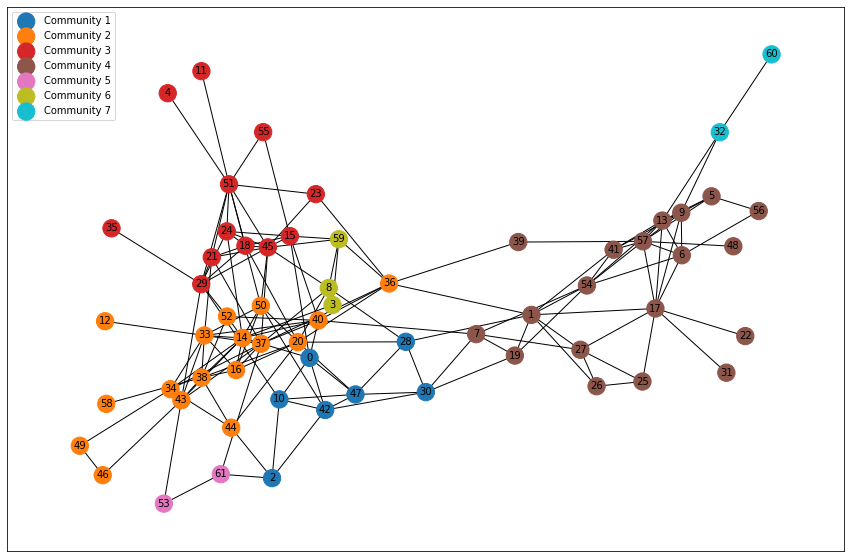

Execution Time: 0.2359771728515625 seconds


In [65]:
import os
file_name = "D2-K=7.csv"
input_file = os.path.join("data", file_name)
output_file = os.path.join("results", file_name)

detector = CommunityDetection()
G1 = detector.load_graph_from_csv(input_file)
start_time = time.time()
detected_communities = detector.girvan_newman(7)
end_time = time.time()
detector.draw_communities(detected_communities)
detector.create_csv(detected_communities, output_file)
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

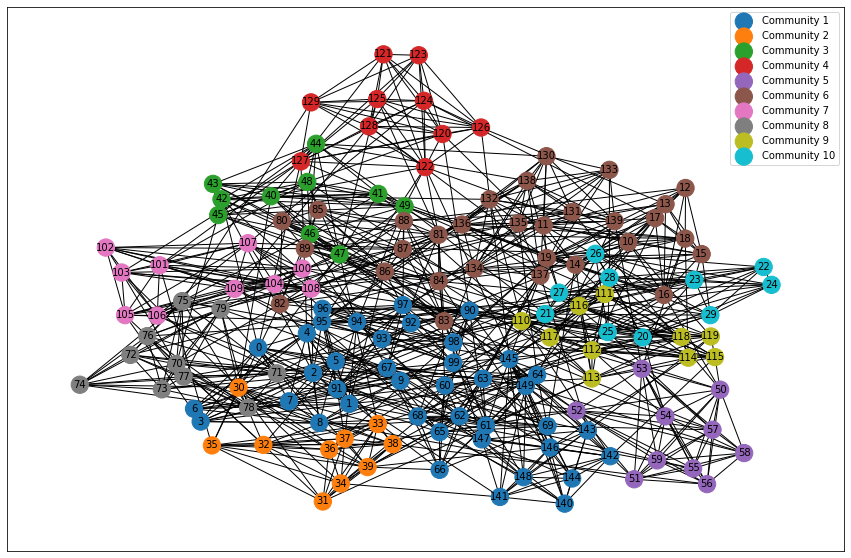

Execution Time: 16.988689422607422 seconds


In [77]:
import os
file_name = "D2-UNC.csv"
input_file = os.path.join("data", file_name)
output_file = os.path.join("results", file_name)

detector = CommunityDetection()
G1 = detector.load_graph_from_csv(input_file)
start_time = time.time()
detected_communities = detector.girvan_newman(10)
end_time = time.time()
detector.draw_communities(detected_communities)
detector.create_csv(detected_communities, output_file)
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

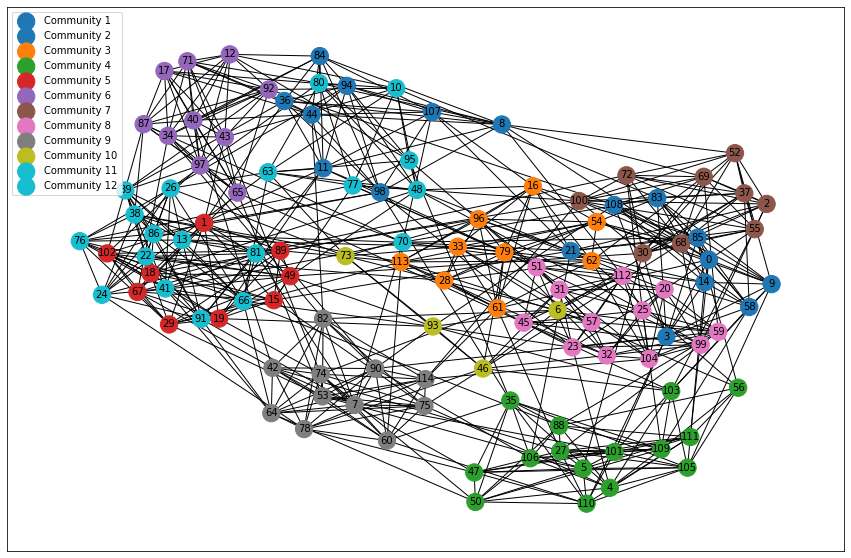

Execution Time: 5.869680643081665 seconds


In [78]:
import os
file_name = "D3-K=12.csv"
input_file = os.path.join("data", file_name)
output_file = os.path.join("results", file_name)

detector = CommunityDetection()
G1 = detector.load_graph_from_csv(input_file)
start_time = time.time()
detected_communities = detector.girvan_newman(12)
end_time = time.time()
detector.draw_communities(detected_communities)
detector.create_csv(detected_communities, output_file)
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")

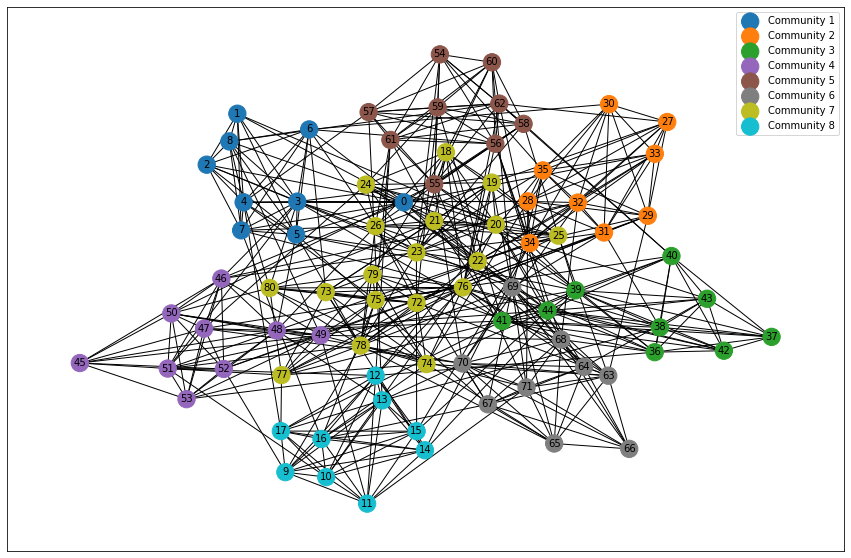

Execution Time: 2.5799949169158936 seconds


In [89]:
import os
file_name = "D3-UNC.csv"
input_file = os.path.join("data", file_name)
output_file = os.path.join("results", file_name)

detector = CommunityDetection()
G1 = detector.load_graph_from_csv(input_file)
start_time = time.time()
detected_communities = detector.girvan_newman(8)
end_time = time.time()
detector.draw_communities(detected_communities)
detector.create_csv(detected_communities, output_file)
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")